In [1]:
import pandas as pd
#Load the dataset
df = pd.read_csv("pick3night.csv")
print(df.shape)
df.head(5)

(8716, 9)


,Title,Month,Day,Year,Number 1,Number 2,Number 3,Unnamed: 7,Unnamed: 8
0,Pick 3 Night,10,25,1993,3,2,9,NaN,NaN
1,Pick 3 Night,10,26,1993,8,4,1,NaN,NaN
2,Pick 3 Night,10,27,1993,9,6,2,NaN,NaN
3,Pick 3 Night,10,28,1993,6,4,7,NaN,NaN
4,Pick 3 Night,10,29,1993,8,0,4,NaN,NaN


In [2]:
#Drop information for summary statistics
df.drop(df.columns[[0,1,2,3,7,8]],axis=1, inplace=True)
df.head()

,Number 1,Number 2,Number 3
0,3,2,9
1,8,4,1
2,9,6,2
3,6,4,7
4,8,0,4


In [3]:
#Concatenate the numbers
s1 = pd.Series(df['Number 1'])
s2 = pd.Series(df['Number 2'])
s3 = pd.Series(df['Number 3'])
df2 = pd.concat([s1, s2, s3], ignore_index=True)
len(df.index)


8716

In [4]:
df2 = pd.DataFrame(df2)
df2.head()

,0
0,3
1,8
2,9
3,6
4,8


In [5]:
df2[[0]].mean()

0    4.517248
dtype: float64

In [6]:
df2[[0]].median()

0    5.0
dtype: float64

In [7]:
df2[[0]].mode()

,0
0,7


In [8]:
df2[[0]].std()

0    2.871805
dtype: float64

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

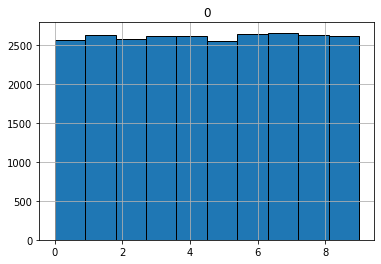

In [9]:
import matplotlib.pyplot as plt
import numpy as np

df2[[0]].hist(bins = 10, range=[0, 9], edgecolor = "black")

In [10]:
import statsmodels.api as sm
from statsmodels.regression import linear_model
from statsmodels.api import add_constant


In [11]:
df2[[1]] = df2[[0]].shift(-1)

In [12]:
df2 = df2.iloc[:-1 , :]
df2.head()

,0,1
0,3,8.0
1,8,9.0
2,9,6.0
3,6,8.0
4,8,7.0


In [22]:
df2.columns=['Present Values','Lagged Values']
df2.head()

,Present Values,Lagged Values
0,3,8.0
1,8,9.0
2,9,6.0
3,6,8.0
4,8,7.0


In [25]:
Y = df2["Present Values"]
X = df2["Lagged Values"]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

In [26]:
print(results.t_test([1, 0]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             4.5329      0.033    136.932      0.000       4.468       4.598


In [27]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Present Values   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3205
Date:                Fri, 27 Aug 2021   Prob (F-statistic):              0.571
Time:                        17:13:21   Log-Likelihood:                -64683.
No. Observations:               26147   AIC:                         1.294e+05
Df Residuals:                   26145   BIC:                         1.294e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.5329      0.033    136.932